In [3]:
!pip install kagglehub

In [7]:
import kagglehub
import os

dataset_name = "chetankv/dogs-cats-images"

path = kagglehub.dataset_download(dataset_name)

print("Path to dataset files:", path)


100%|██████████| 435M/435M [00:12<00:00, 37.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/chetankv/dogs-cats-images/versions/1


In [9]:
import zipfile

# O caminho do arquivo zip dentro do diretório baixado
zip_path = os.path.join(path, "dogs-cats-images.zip")

# Pasta de destino para descompactar
extract_path = "dogs-cats-images"
os.makedirs(extract_path, exist_ok=True)

print(f"Tentando descompactar de: {zip_path}")
print(f"Para o diretório: {extract_path}")

Tentando descompactar de: /root/.cache/kagglehub/datasets/chetankv/dogs-cats-images/versions/1/dogs-cats-images.zip
Para o diretório: dogs-cats-images


In [11]:
# O caminho retornado já aponta para a pasta raiz dos arquivos.
dataset_base_path = path

# As pastas de treino e teste estão dentro da estrutura do dataset.
train_dir = os.path.join(dataset_base_path, 'dataset', 'training_set')
test_dir = os.path.join(dataset_base_path, 'dataset', 'test_set')

# Verifique se os diretórios existem
if os.path.exists(train_dir):
    print("Diretório de treino encontrado:", train_dir)
else:
    print("Erro: Diretório de treino não encontrado em:", train_dir)

if os.path.exists(test_dir):
    print("Diretório de teste encontrado:", test_dir)
else:
    print("Erro: Diretório de teste não encontrado em:", test_dir)

Diretório de treino encontrado: /root/.cache/kagglehub/datasets/chetankv/dogs-cats-images/versions/1/dataset/training_set
Diretório de teste encontrado: /root/.cache/kagglehub/datasets/chetankv/dogs-cats-images/versions/1/dataset/test_set


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT = 160
IMG_WIDTH = 160
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:

from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    include_top=False,
    weights='imagenet'
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
base_model.trainable = False

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')
])

In [16]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.7383 - loss: 0.5325 - val_accuracy: 0.9420 - val_loss: 0.2086
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.8929 - loss: 0.2772 - val_accuracy: 0.9550 - val_loss: 0.1438
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.9177 - loss: 0.2175 - val_accuracy: 0.9595 - val_loss: 0.1187
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.9258 - loss: 0.1863 - val_accuracy: 0.9610 - val_loss: 0.1047
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.9347 - loss: 0.1689 - val_accuracy: 0.9640 - val_loss: 0.0971
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.9334 - loss: 0.1624 - val_accuracy: 0.9660 - val_loss: 0.0913
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.9338 - loss: 0.1552 - val_accuracy: 0.9660 - val_loss: 0.0878
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.9421 - loss: 0.1520 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
O modelo previu: Cachorro (98.92%)


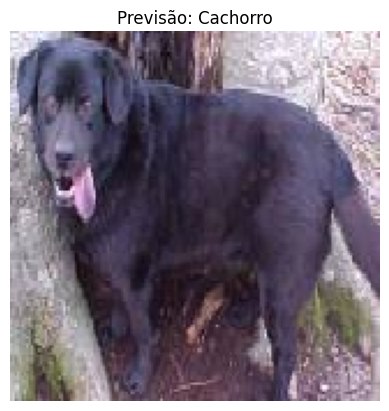

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import random

dog_test_path = os.path.join(test_dir, 'dogs')
image_files = os.listdir(dog_test_path)
random_image_file = random.choice(image_files)


image_path = os.path.join(dog_test_path, random_image_file)


if not os.path.exists(image_path):
    print(f"Erro: A imagem '{image_path}' não foi encontrada.")
else:
    # Pré-processe a imagem
    img = image.load_img(image_path, target_size=(160, 160))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0


    prediction = model.predict(img_array)[0][0]

    Interprete e exiba o resultado
    if prediction > 0.5:
        print(f"O modelo previu: Cachorro ({prediction*100:.2f}%)")
        class_name = 'Cachorro'
    else:
        print(f"O modelo previu: Gato ({(1-prediction)*100:.2f}%)")
        class_name = 'Gato'

    plt.imshow(img)
    plt.title(f"Previsão: {class_name}")
    plt.axis('off')
    plt.show()